<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/akunaPlotata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **akunaPlotata**
## **Usage of generalised plotter Python Code**

### **Overview**
This script enables the visualization of 2D functions as 3D surface plots. The modular design supports plotting arbitrary mathematical functions, making it an excellent tool for visualizing diffraction patterns, mathematical surfaces, and more.

### **Key Functions**

1. **`create_grid_and_intensity(func, x_range, y_range, resolution)`**
   - **Purpose**: Creates a 2D grid and computes the intensity of a given function.
   - **Parameters**:
     - `func`: A function that computes the intensity based on radial distance.
     - `x_range`: A tuple specifying the range of x-values (default `(-10, 10)`).
     - `y_range`: A tuple specifying the range of y-values (default `(-10, 10)`).
     - `resolution`: Number of points in each dimension (default `500`).
   - **Returns**: A tuple `(x, y, intensity)`.

2. **`plot_surface(x, y, intensity, title="Surface Plot")`**
   - **Purpose**: Generates a 3D surface plot from the computed grid and intensity.
   - **Parameters**:
     - `x, y`: Grid coordinates.
     - `intensity`: Intensity values for the plot.
     - `title`: Title of the plot (default `"Surface Plot"`).
   - **Usage**: Call this function after `create_grid_and_intensity` to visualize the function.

3. **Example Functions**
   - **`airy_disk(r)`**:
     - Computes the Airy disk pattern for a circular aperture.
   - **`bessel_function(r)`**:
     - Computes the squared Bessel function of the first kind.
   - **Placeholders**:
     - Functions for square, slit, and Bahtinov aperture masks can be added as needed.

4. **`main()`**:
   - Central entry point to configure parameters and generate plots.
   - Allows switching between functions (e.g., `airy_disk`, `bessel_function`) to explore different patterns.

---

## **How to Use**

1. **Run the Script**:
   - Execute the script as is, with the default `airy_disk` function.
   - Customize `x_range`, `y_range`, and `resolution` in the `main()` function for different views.

2. **Extend the Script**:
   - Add new functions following the template of `airy_disk` or `bessel_function`.
   - Update the `main()` function to call your new functions.

3. **Integration**:
   - Use in Jupyter notebooks or Google Colab for interactive exploration.
   - Save results directly to a GitHub repository for sharing or collaboration.

---

## **Examples**

1. **Visualizing the Airy Disk**:
   ```python
   func_to_plot = airy_disk
   title = "Airy Disk Diffraction Pattern"
   x, y, intensity = create_grid_and_intensity(func_to_plot)
   plot_surface(x, y, intensity, title)
   ```

2. **Visualizing the Bessel Function**:
   ```python
   func_to_plot = bessel_function
   title = "Bessel Function Surface Plot"
   x, y, intensity = create_grid_and_intensity(func_to_plot)
   plot_surface(x, y, intensity, title)
   ```

3. **Adding a Custom Aperture Mask**:
   Define a function:
   ```python
   def custom_aperture(r):
       return np.exp(-r**2) * np.cos(r)**2
   ```

   Call it in `main()`:
   ```python
   func_to_plot = custom_aperture
   title = "Custom Aperture Mask Diffraction Pattern"
   x, y, intensity = create_grid_and_intensity(func_to_plot)
   plot_surface(x, y, intensity, title)
   ```



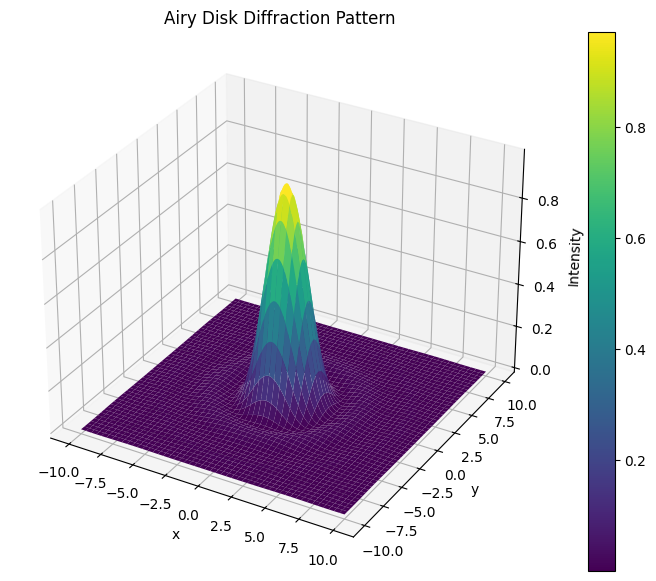

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.special import j1

# Define a small constant to avoid division by zero
SMALL_VALUE = 1e-10

# Create a grid of x, y points and compute the function intensity
def create_grid_and_intensity(func, x_range=(-10, 10), y_range=(-10, 10), resolution=500):
    """Create a grid of x, y points and compute the intensity using a given function."""
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    x, y = np.meshgrid(x, y)
    r = np.sqrt(x**2 + y**2)
    intensity = func(r)
    return x, y, intensity

# Plot the surface
def plot_surface(x, y, intensity, title="Surface Plot"):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, intensity, cmap=cm.viridis, edgecolor='none')

    # Add color bar and labels with dynamic shrink and aspect adjustments
    fig_size = fig.get_size_inches()
    shrink = min(1, 10 / max(fig_size))  # Adjust shrink dynamically
    aspect = max(1, int(fig_size[0] * 2))  # Adjust aspect dynamically
    fig.colorbar(surf, ax=ax, shrink=shrink, aspect=aspect)

    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Intensity')

    plt.show()

# Example diffraction functions
def airy_disk(r):
    """Airy disk function for a circular aperture."""
    r = np.where(r == 0, SMALL_VALUE, r)
    return (2 * j1(r) / r) ** 2

def bessel_function(r):
    """First-order Bessel function squared."""
    r = np.where(r == 0, SMALL_VALUE, r)
    return (j1(r)) ** 2

# Add more functions for different aperture masks
def square_aperture(r):
    """Placeholder for square aperture diffraction."""
    return np.exp(-r**2)

def slit_aperture(r):
    """Placeholder for slit diffraction."""
    return np.sinc(r) ** 2

def bahtinov_mask(r):
    """Placeholder for Bahtinov mask diffraction."""
    return np.cos(r) ** 2

# Main function to encapsulate logic
def main():
    x_range = (-10, 10)
    y_range = (-10, 10)
    resolution = 500

    # Choose the function to plot
    func_to_plot = airy_disk  # Replace with any function, e.g., bessel_function
    title = "Airy Disk Diffraction Pattern"

    # Generate the grid and plot
    x, y, intensity = create_grid_and_intensity(func_to_plot, x_range, y_range, resolution)
    plot_surface(x, y, intensity, title)

if __name__ == "__main__":
    main()
